# 0.0 - Imports

In [9]:
import warnings

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import metrics as mt
from sklearn.linear_model import LogisticRegression

In [10]:
warnings.filterwarnings("ignore")

# 1.0 - Load Data

In [11]:
# Train Dataset
X_train = pd.read_csv("../../../data/classification_X_training.csv")
y_train = pd.read_csv("../../../data/classification_y_training.csv")

# Validation Dataset
X_val = pd.read_csv("../../../data/classification_X_validation.csv")
y_val = pd.read_csv("../../../data/classification_y_validation.csv")

# Test Dataset
X_test = pd.read_csv("../../../data/classification_X_test.csv")
y_test = pd.read_csv("../../../data/classification_y_test.csv")

In [12]:
y_train = y_train.iloc[:, 0]
y_val = y_val.iloc[:, 0]
y_test = y_test.iloc[:, 0]

# 2.0 - Logistic Regression

### Parameteres:
- `C`
- `solver`
- `max_iter`

## 2.1 - Performance for Train Dataset

In [13]:
# Base Model
regress = LogisticRegression(random_state=42)

# Fit Model
regress.fit(X_train, y_train)

# Predict
y_pred_train = regress.predict(X_train)


# Performance Metrics
accuracy_train = mt.accuracy_score(y_train, y_pred_train)
precision_train = mt.precision_score(y_train, y_pred_train)
recall_train = mt.recall_score(y_train, y_pred_train)
f1_score_train = mt.f1_score(y_train, y_pred_train)

print(f"Train Accuracy: {accuracy_train}")
print(f"Train Precision: {precision_train}")
print(f"Train Recall: {recall_train}")
print(f"Train F1 Score: {f1_score_train}")

Train Accuracy: 0.5666000137902503
Train Precision: 0.0
Train Recall: 0.0
Train F1 Score: 0.0


## 2.2 - Performance for Validation Dataset

In [14]:
# Base Model
regress = LogisticRegression(random_state=42)

# Fit Model
regress.fit(X_train, y_train)

# Predict
y_pred_val = regress.predict(X_val)

# Performance Metrics
accuracy_val = mt.accuracy_score(y_val, y_pred_val)
precision_val = mt.precision_score(y_val, y_pred_val)
recall_val = mt.recall_score(y_val, y_pred_val)
f1_score_val = mt.f1_score(y_val, y_pred_val)

print(f"Validation Accuracy: {accuracy_val}")
print(f"Validation Precision: {precision_val}")
print(f"Validation Recall: {recall_val}")
print(f"Validation F1 Score: {f1_score_val}")

Validation Accuracy: 0.5666205476366678
Validation Precision: 0.0
Validation Recall: 0.0
Validation F1 Score: 0.0


## 2.3 - Hyperparameters Fine Tunning

### `C`

In [15]:
C = np.arange(0.1, 2.01, 0.01)

accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []

In [16]:
for i in C:
    # Define Model
    regress = LogisticRegression(C=i, random_state=42)
    regress.fit(X_train, np.ravel(y_train))

    # Predict
    y_pred = regress.predict(X_val)

    # Performance Metrics
    accuracy = mt.accuracy_score(y_val, y_pred)
    precision = mt.precision_score(y_val, y_pred)
    recall = mt.recall_score(y_val, y_pred)
    f1_score = mt.f1_score(y_val, y_pred)

    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1_score)

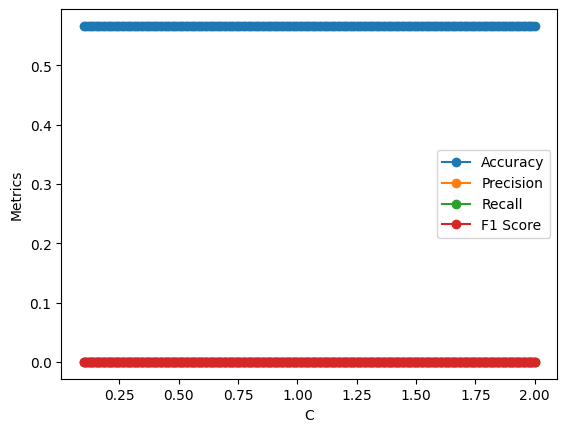

In [17]:
plt.plot(C, accuracy_list, marker="o", label="Accuracy")
plt.plot(C, precision_list, marker="o", label="Precision")
plt.plot(C, recall_list, marker="o", label="Recall")
plt.plot(C, f1_score_list, marker="o", label="F1 Score")
plt.xlabel("C")
plt.ylabel("Metrics")
plt.legend()

In [18]:
best_C = C[np.argmax(accuracy_list)]
best_C

0.1

### `solver`

In [19]:
solver = ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]

accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []

In [20]:
for i in solver:
    # Define Model
    regress = LogisticRegression(solver=i, C=best_C, random_state=42)
    regress.fit(X_train, y_train)

    # Predict
    y_pred = regress.predict(X_val)

    # Performance Metrics
    accuracy = mt.accuracy_score(y_val, y_pred)
    precision = mt.precision_score(y_val, y_pred)
    recall = mt.recall_score(y_val, y_pred)
    f1_score = mt.f1_score(y_val, y_pred)

    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1_score)

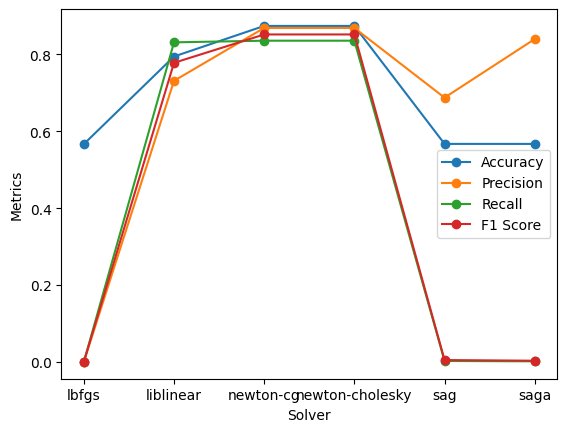

In [21]:
plt.plot(solver, accuracy_list, marker="o", label="Accuracy")
plt.plot(solver, precision_list, marker="o", label="Precision")
plt.plot(solver, recall_list, marker="o", label="Recall")
plt.plot(solver, f1_score_list, marker="o", label="F1 Score")
plt.xlabel("Solver")
plt.ylabel("Metrics")
plt.legend()

In [22]:
best_solver = solver[np.argmax(accuracy_list)]
best_solver

'newton-cg'

### `max_iter`

In [23]:
max_iter = np.arange(100, 5000, 100)

accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []

In [24]:
for i in max_iter:
    # Define Model
    regress = LogisticRegression(
        max_iter=i, solver=best_solver, C=best_C, random_state=42
    )
    regress.fit(X_train, y_train)

    # Predict
    y_pred = regress.predict(X_val)

    # Performance Metrics
    accuracy = mt.accuracy_score(y_val, y_pred)
    precision = mt.precision_score(y_val, y_pred)
    recall = mt.recall_score(y_val, y_pred)
    f1_score = mt.f1_score(y_val, y_pred)

    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1_score)

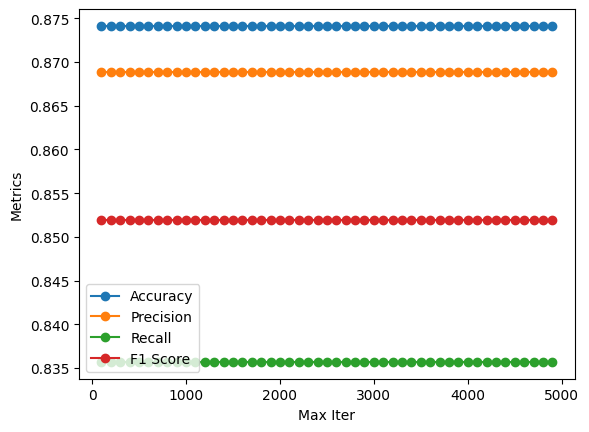

In [25]:
plt.plot(max_iter, accuracy_list, marker="o", label="Accuracy")
plt.plot(max_iter, precision_list, marker="o", label="Precision")
plt.plot(max_iter, recall_list, marker="o", label="Recall")
plt.plot(max_iter, f1_score_list, marker="o", label="F1 Score")
plt.xlabel("Max Iter")
plt.ylabel("Metrics")
plt.legend()

In [26]:
best_iter = max_iter[np.argmax(accuracy_list)]
best_iter

100

## 2.4 - Train Final Model

In [27]:
# Define Model
regress = LogisticRegression(
    C=best_C, max_iter=best_iter, solver=best_solver, random_state=42
)
regress.fit(pd.concat([X_train, X_val], axis=0), pd.concat([y_train, y_val], axis=0))

# Predict
y_pred_test = regress.predict(X_test)

# Performance Metrics
accuracy_test = mt.accuracy_score(y_test, y_pred_test)
precision_test = mt.precision_score(y_test, y_pred_test)
recall_test = mt.recall_score(y_test, y_pred_test)
f1_score_test = mt.f1_score(y_test, y_pred_test)

print(f"Test Accuracy: {accuracy_test}")
print(f"Test Precision: {precision_test}")
print(f"Test Recall: {recall_test}")
print(f"Test F1 Score: {f1_score_test}")

Test Accuracy: 0.8712779515699224
Test Precision: 0.8672275054864668
Test Recall: 0.8344918609766828
Test F1 Score: 0.8505448186179992


# 3.0 - Save Results

In [28]:
train_metrics = {
    "Algorithm": "Logistic Regression",
    "Accuracy": np.round(accuracy_train, 3),
    "Precision": np.round(precision_train, 3),
    "Recall": np.round(recall_train, 3),
    "F1 Score": np.round(f1_score_train, 3),
}
validation_metrics = {
    "Algorithm": "Logistic Regression",
    "Accuracy": np.round(accuracy_val, 3),
    "Precision": np.round(precision_val, 3),
    "Recall": np.round(recall_val, 3),
    "F1 Score": np.round(f1_score_val, 3),
}
test_metrics = {
    "Algorithm": "Logistic Regression",
    "Accuracy": np.round(accuracy_test, 3),
    "Precision": np.round(precision_test, 3),
    "Recall": np.round(recall_test, 3),
    "F1 Score": np.round(f1_score_test, 3),
}

pd.DataFrame(train_metrics, index=[0]).to_csv(
    "./train_metrics.csv", mode="a", header=False
)
pd.DataFrame(validation_metrics, index=[0]).to_csv(
    "./validation_metrics.csv", mode="a", header=False
)
pd.DataFrame(test_metrics, index=[0]).to_csv(
    "./test_metrics.csv", mode="a", header=False
)